In [167]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.stats import norm

In [168]:
df = pd.read_excel('./평균_표준편차.xlsx', sheet_name = 1)
df

,요인명,군집명,평균,표준편차,경영위기여부
0,z_sum_sales_card2,군집0,0.181000,1.375444,0
1,z_sum_sales_card2,군집0,-0.081129,0.863522,1
2,z_sum_sales_card2,군집1,-0.062529,0.630081,0
3,z_sum_sales_card2,군집1,-0.304258,0.281004,1
4,z_sum_sales_card2,군집2,-0.095243,0.403066,0
...,...,...,...,...,...
451,남성연령대_50_직장_인구_수,군집1,486.640496,360.303245,1
452,남성연령대_50_직장_인구_수,군집2,1226.190845,680.475028,0
453,남성연령대_50_직장_인구_수,군집2,1168.693452,457.495828,1
454,남성연령대_50_직장_인구_수,군집3,1853.442239,NaN,0


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   요인명     456 non-null    object 
 1   군집명     456 non-null    object 
 2   평균      456 non-null    float64
 3   표준편차    440 non-null    float64
 4   경영위기여부  456 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 17.9+ KB


In [170]:
# 결측치 처리
df = df.fillna(0)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   요인명     456 non-null    object 
 1   군집명     456 non-null    object 
 2   평균      456 non-null    float64
 3   표준편차    456 non-null    float64
 4   경영위기여부  456 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 17.9+ KB


In [181]:
def visualize_plot(feature, cluster_group, idx):
    
    risky0 = df.loc[(df['요인명'] == feature) & (df['군집명'] == cluster_group) & (df['경영위기여부'] == 0)][['평균', '표준편차']]
    risky1 = df.loc[(df['요인명'] == feature) & (df['군집명'] == cluster_group) & (df['경영위기여부'] == 1)][['평균', '표준편차']]
    
    avg0, avg1 = risky0['평균'].iloc[0], risky1['평균'].iloc[0]
    std0, std1 = risky0['표준편차'].iloc[0], risky1['표준편차'].iloc[0]
    
    x_start = -3*std0 + avg0 if ((-3*std0 + avg0) < (-3*std1 + avg1)) else -3*std1 + avg1
    x_end = 3*std0 + avg0 if ((3*std0 + avg0) > (3*std1 + avg1)) else 3*std1 + avg1
    x = np.linspace(x_start, x_end, 500)
    
    plt.subplot(57, 4, idx)
    plt.clf()      
    plt.title(f'{cluster_group}의 {feature} 분포')
    plt.plot(x, norm.pdf(x, loc=avg0, scale=std0), label='is_risky=0')
    plt.plot(x, norm.pdf(x, loc=avg1, scale=std1), label='is_risky=1')
    plt.grid()
    plt.legend()
    
    dir_path = f'./평균_표준편차_시각화/{feature}'
        
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)
    plt.savefig(f'./평균_표준편차_시각화/{feature}/{cluster_group}의_{feature}의 분포.png')
    

z_sum_sales_card2 군집0
z_sum_sales_card2 군집1
z_sum_sales_card2 군집2


C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)


z_sum_sales_card2 군집3
z_sum_weekend_sales_card 군집0
z_sum_weekend_sales_card 군집1


C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)


z_sum_weekend_sales_card 군집2
z_sum_weekend_sales_card 군집3
sum_weekend_sales_card 군집0


C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)


sum_weekend_sales_card 군집1
sum_weekend_sales_card 군집2
sum_weekend_sales_card 군집3


C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)


sum_sales_card 군집0
sum_sales_card 군집1
sum_sales_card 군집2


C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)


sum_sales_card 군집3
z_monthly_rental_fee 군집0
z_monthly_rental_fee 군집1


C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)


z_monthly_rental_fee 군집2
z_monthly_rental_fee 군집3
z_sum_purchase_invoice 군집0


C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)


z_sum_purchase_invoice 군집1
z_sum_purchase_invoice 군집2
z_sum_purchase_invoice 군집3


C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)


sum_new_customer_cnt 군집0
sum_new_customer_cnt 군집1
sum_new_customer_cnt 군집2


C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)


sum_new_customer_cnt 군집3
z_sum_purchase_cash 군집0
z_sum_purchase_cash 군집1


C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)


z_sum_purchase_cash 군집2
z_sum_purchase_cash 군집3
남성_매출_비율 군집0


C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)


남성_매출_비율 군집1
남성_매출_비율 군집2
남성_매출_비율 군집3


C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)


sum_customer_cnt 군집0
sum_customer_cnt 군집1
sum_customer_cnt 군집2


C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)


sum_customer_cnt 군집3
폐업_영업_개월_평균 군집0
폐업_영업_개월_평균 군집1


C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)


폐업_영업_개월_평균 군집2
폐업_영업_개월_평균 군집3
운영_영업_개월_평균 군집0


C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)


운영_영업_개월_평균 군집1
운영_영업_개월_평균 군집2
운영_영업_개월_평균 군집3


C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)


연령대_60_이상_매출_비율 군집0
연령대_60_이상_매출_비율 군집1
연령대_60_이상_매출_비율 군집2


C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)


연령대_60_이상_매출_비율 군집3
아파트_면적_165_제곱미터_세대_수 군집0
아파트_면적_165_제곱미터_세대_수 군집1


C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)


아파트_면적_165_제곱미터_세대_수 군집2
아파트_면적_165_제곱미터_세대_수 군집3
수요일_매출_비율 군집0


C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)


수요일_매출_비율 군집1
수요일_매출_비율 군집2
수요일_매출_비율 군집3


C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)


개업_율 군집0
개업_율 군집1
개업_율 군집2


C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)


개업_율 군집3
버스_정거장_수 군집0
버스_정거장_수 군집1


C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)


버스_정거장_수 군집2
버스_정거장_수 군집3
관공서_수 군집0


C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)


관공서_수 군집1
관공서_수 군집2


C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)


관공서_수 군집3
regular_employees_count 군집0
regular_employees_count 군집1


C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)


regular_employees_count 군집2
regular_employees_count 군집3
age 군집0


C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)


age 군집1
age 군집2
age 군집3


C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)


월요일_매출_비율 군집0
월요일_매출_비율 군집1
월요일_매출_비율 군집2


C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)


월요일_매출_비율 군집3
시간대_21~24_매출_비율 군집0
시간대_21~24_매출_비율 군집1


C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)


시간대_21~24_매출_비율 군집2
시간대_21~24_매출_비율 군집3
연령대_30_매출_비율 군집0


C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)


연령대_30_매출_비율 군집1
연령대_30_매출_비율 군집2
연령대_30_매출_비율 군집3


C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)


아파트_가격_6_억_이상_세대_수 군집0
아파트_가격_6_억_이상_세대_수 군집1
아파트_가격_6_억_이상_세대_수 군집2


C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)


아파트_가격_6_억_이상_세대_수 군집3
연령대_40_매출_비율 군집0
연령대_40_매출_비율 군집1


C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)


연령대_40_매출_비율 군집2
연령대_40_매출_비율 군집3
대학교_수 군집0


C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
c:\Users\user\anaconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2093: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)


대학교_수 군집1
대학교_수 군집2
대학교_수 군집3


C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
c:\Users\user\anaconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2093: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)


여성연령대_50_직장_인구_수 군집0
여성연령대_50_직장_인구_수 군집1
여성연령대_50_직장_인구_수 군집2


C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)


여성연령대_50_직장_인구_수 군집3
폐업_율 군집0
폐업_율 군집1


C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)


폐업_율 군집2
폐업_율 군집3
여성_매출_비율 군집0


C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)


여성_매출_비율 군집1
여성_매출_비율 군집2
여성_매출_비율 군집3


C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)


z_sum_sales_delivery 군집0
z_sum_sales_delivery 군집1
z_sum_sales_delivery 군집2


C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)


z_sum_sales_delivery 군집3
목요일_매출_비율 군집0
목요일_매출_비율 군집1


C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)


목요일_매출_비율 군집2
목요일_매출_비율 군집3


C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)
C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)


소득_구간_코드 군집0
소득_구간_코드 군집1
소득_구간_코드 군집2
소득_구간_코드 군집3


C:\Users\user\AppData\Local\Temp\ipykernel_17504\3551681392.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(57, 4, idx)


IndexError: single positional indexer is out-of-bounds

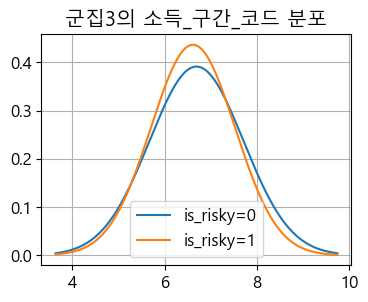

In [183]:
features = list(pd.unique(df['요인명']))
clusters = ['군집0', '군집1', '군집2', '군집3']
idx = 0

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False  

for feature in features:
    for cluster in clusters:
        idx += 1
        visualize_plot(feature, cluster, idx)
        print(feature, cluster)
        # plt.show()
        